<table width="100%" style="border:0px;">
    <tr style="font-size: 10pt">
        <td><b>Name:</b> Huỳnh Thảo Quỳnh</td>
        <td><b>MSSV:</b> 22280075</td>
        <td><b>Lab04:</b> KMeans Clustering</td>
    </tr>
</table>

### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data preprocessing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/TQuynh109/Lab04_KMean/main/College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

=> No missing values.

In [ ]:
data.nunique()

Unnamed: 0     777
Private          2
Apps           711
Accept         693
Enroll         581
Top10perc       82
Top25perc       89
F.Undergrad    714
P.Undergrad    566
Outstate       640
Room.Board     553
Books          122
Personal       294
PhD             78
Terminal        65
S.F.Ratio      173
perc.alumni     61
Expend         744
Grad.Rate       81
dtype: int64

- **Unnamed** column: all college names are unique, they will not bring value when clustering. So I can drop them.

In [ ]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


- PhD: is a percentage but max is 103.
- Grad.Rate: is a percentage but max is 118.

-> Check 2 this columns

In [ ]:
data[(data['PhD'] > 100) | (data['Grad.Rate'] > 100)]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [ ]:
#I can impute them to 100
data.loc[582, 'PhD'] = 100
data.loc[95, 'Grad.Rate'] = 100

In [ ]:
#Encoding categorical variables: Private column
data['Private'].value_counts()

Private
Yes    565
No     212
Name: count, dtype: int64

=> Replacing the Yes and No to 1 and 0.

In [ ]:
data.Private = data.Private.replace({"Yes" : 1, "No" : 0})

In [ ]:
X = data.drop(columns=['Private'], axis=1)
y = data['Private']

In [ ]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_std = sc.fit_transform(X)

# 2. K-Means clustering algorithm

#### 2.1 K-Mean Algorithm

In [ ]:
from scipy.spatial import distance

#Initialize initial centers
def kmean_init_centers(X,k, random_state):
    if random_state is not None:
        np.random.seed(random_state)
    return X[np.random.choice(X.shape[0], k, replace=False)]


#Assign new labels to point when knowing the centers
def assign_newlabels(X, centers):
    dist = distance.cdist(X, centers)       #Calculate pairwise distance between data and centers
    return np.argmin(dist, axis=1)          #Return index of the closest center


#Update new centers based on newly labeled data
def update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))

    for k in range(K):
        Xk = X[labels == k, :]   #Collect all points assigned to the k-th cluster
        centers[k,:] = np.mean(Xk, axis=0)      #Take average
    return centers


#Check the stopping condition of the algorithm
def has_converged(centers, new_centers, tol=1e-4):
    # Return True if the difference between two sets of centers is smaller than tolerance
    return np.all(np.linalg.norm(centers - new_centers, axis=1) < tol)

#### 2.2 **Parameters**
   - The number of cluster            : K
   - Convergence tolerance            : tol = 1e-4  
   - Maximum the number of iterations : max_iter

In [ ]:
#KMeans Algorithm

def kmean(X, K, max_iter, tol=1e-4, random_state = None):
    #Init centers,
    centers = [kmean_init_centers(X, K, random_state)]
    labels = []
    iter = 0

    while True:
        #Assign a label to each data point
        labels.append(assign_newlabels(X, centers[-1]))
        #Update new centers
        new_centers = update_centers(X, labels[-1], K)
        #Check converged
        if has_converged(centers[-1], new_centers, tol) or iter >= max_iter:
            break
        centers.append(new_centers)
        # increase iteration count
        iter += 1

    return (centers[-1], labels[-1], iter)

#### 2.3 **Attributes + Methods**
   - cluster_centers_  : centers
   - labels_           : labels
   - n_iter_           : iter
   - inertia_          :  **def calculate_inertia (X, centers)**


In [ ]:
#Calculate inertia
def calculate_inertia(X, centers):
    #Calculate the distance from each data point to all cluster centers
    dis_to_center = np.linalg.norm(X[:, np.newaxis] - centers, axis = 2)
    #Calculate the sum of squares of the distance from each data point to the nearest cluster center
    inertia = np.sum(np.min(dis_to_center, axis=1) ** 2)
    return inertia

Define a K-Mean class **from scratch** using **Numpy**

In [ ]:
class custom_KMeans:
    #The constructor of the KMeans class
    def __init__(self, K = 8, max_iter = 300, tol=1e-4, random_state = None):
        self.K = K
        self.tol = tol
        self.max_iter = max_iter
        self.random_state = random_state

        self.cluster_centers_ = None
        self.labels_ = None
        self.n_iter_ = None
        self.inertia_ = None

    #Fit data into the model
    def fit(self, X):
        self.cluster_centers_, self.labels_, self.n_iter_ = kmean(X, self.K, self.max_iter, self.tol, self.random_state)
        self.inertia_ = calculate_inertia(X, self.cluster_centers_)

    #Convert data points into distance values to cluster centers
    def transform(self, X):
        if self.cluster_centers_ is None:
            raise ValueError("Model not fitted. Call fit method first!!")
        distances = distance.cdist(X, self.cluster_centers_)
        return np.min(distances, axis=1)

    #Predict labels of data points
    def predict(self, X):
        if self.cluster_centers_ is None:
            raise ValueError("Model not fitted. Call fit method first!!")
        distances = distance.cdist(X, self.cluster_centers_)
        return np.argmin(distances, axis=1)

    #Combine data fitting and data transformation
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    #Combine data fitting and predict the labels of data points
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

# 3. Testing and Validation

#### 3.1 Test your custom KMeans class implementation on the provided dataset.

In [ ]:
#Choose randomly K: = 4
custom_model = custom_KMeans(K=4, max_iter=300, tol=1e-4, random_state=0)
custom_model.fit(X_std)

In [ ]:
#Attributes
print("cluster_centers_ : ",custom_model.cluster_centers_)
print("\nlabels_ : ", custom_model.labels_)

cluster_centers_ :  [[0.03687103 0.04938332 0.06725618 0.30818491 0.5748548  0.05575404
  0.01897031 0.51079624 0.47152544 0.19922497 0.14032508 0.75760456
  0.79752852 0.28299983 0.43720295 0.12891158 0.70849176]
 [0.11526583 0.10443146 0.1445938  0.64131296 0.86198747 0.12051141
  0.01393639 0.76128255 0.59639622 0.21833611 0.12313223 0.90042076
  0.94001132 0.19870852 0.57879704 0.29770455 0.82485066]
 [0.15969845 0.20481037 0.35237258 0.24843817 0.53855088 0.37815614
  0.13101141 0.25070466 0.33039861 0.21721519 0.24498355 0.80699894
  0.84670518 0.39793805 0.22154472 0.09100873 0.50840108]
 [0.02417892 0.03260483 0.05563333 0.15425645 0.34220813 0.0518137
  0.02684764 0.29912519 0.32072158 0.19317883 0.17076746 0.54971549
  0.56433239 0.33413103 0.26866611 0.0739777  0.51360925]]

labels_ :  [3 3 3 1 3 0 0 0 0 3 0 1 0 0 3 3 1 3 3 3 0 2 3 2 0 3 0 2 3 0 0 0 3 3 0 3 1
 1 0 2 0 0 3 3 0 3 3 0 0 0 3 3 3 3 0 0 3 3 3 1 1 2 3 0 1 3 3 3 0 2 1 1 1 0
 0 3 0 0 2 2 0 3 3 0 0 3 1 1 0 3 0 1 3 3 0

In [ ]:
print("n_iter_ : ",custom_model.n_iter_)
print("\ninertia_ : ", custom_model.inertia_)

n_iter_ :  8

inertia_ :  161.31202295120914


#### 3.2 Validate the correctness of your implementation by comparing results with sklearn's KMeans implementation.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.cluster import KMeans
sklearn_KMean = KMeans(n_clusters=4, random_state=0)
sklearn_KMean.fit(X_std)

KMeans(n_clusters=4, random_state=0)

In [ ]:
#Attributes
print("cluster_centers_ : ", sklearn_KMean.cluster_centers_)
print("\nlabels_ : ", sklearn_KMean.labels_)

cluster_centers_ :  [[0.02503352 0.03342357 0.05616166 0.15520276 0.34393803 0.0523665
  0.02685717 0.30030433 0.32498966 0.1934324  0.17038819 0.552067
  0.56755824 0.33359996 0.26910861 0.07421269 0.51591985]
 [0.16005307 0.20600569 0.35583212 0.25141366 0.54182181 0.38185234
  0.1328669  0.25125418 0.32896053 0.21698266 0.24631506 0.80722242
  0.84688995 0.39771342 0.22094525 0.09167716 0.50780533]
 [0.12074125 0.10802794 0.15079946 0.65505142 0.87141594 0.1259643
  0.01470801 0.76564251 0.60407698 0.22177147 0.12549969 0.90504748
  0.94086509 0.19709716 0.57758621 0.30503204 0.83154534]
 [0.03696553 0.04957782 0.06724096 0.31240032 0.58066933 0.05564301
  0.0183801  0.51708028 0.47048989 0.19863744 0.13896773 0.76239295
  0.80322967 0.28184662 0.44341856 0.13092463 0.71018519]]

labels_ :  [0 0 0 2 0 3 3 3 3 0 3 3 3 3 0 0 2 0 0 0 3 1 0 1 3 0 3 1 0 3 3 3 0 0 3 0 2
 2 3 1 3 3 0 0 3 0 0 3 3 3 0 0 0 0 3 3 0 0 0 2 2 1 0 3 2 0 0 0 3 1 2 2 2 3
 3 0 3 3 1 1 3 0 0 3 3 0 2 2 3 0 3 2 0 0 3 0 

In [ ]:
print("n_iter_ : ", sklearn_KMean.n_iter_)
print("\ninertia_ : ", sklearn_KMean.inertia_)

n_iter_ :  12

inertia_ :  161.2583995719441


**Compare custom_KMean & KMean from sklearn**:
- cluster_centers: the values ​​are nearly equal
- labels: the numbers in the labels of the two algorithms are not the same.
- n_iter_: custom_KMean ~= sklearn_KMean
- inertia_: custom_KMean ~= sklearn_KMean

=> The indexes of custom_KMean are quite similar to the sklearn_KMean library, indicating that the algorithm works well in clustering data.

#### 3.3 Experiment with different values of K (number of clusters) and choose an optimal value based on appropriate evaluation metrics (e.g., silhouette score, elbow method).

##### a. Silhouette score

In [ ]:
#Silhouette score: using KMean from sklearn
from sklearn.metrics import silhouette_score
num_cluster = [2,3,4,5,6,7,8,9,10,15,25,30]
silhouettes_score = []

#Experiment with many n_cluster
for num in num_cluster:
    kmean_list = KMeans(n_clusters=num, random_state=0)
    kmean_list.fit(X_std)

    silhouettes_score.append(silhouette_score(X_std, kmean_list.predict(X_std)))

In [ ]:
#Create DataFrame score
df_silhouette = pd.DataFrame({'n_clusters': num_cluster,
                   'silhouette_score': silhouettes_score})

df_silhouette

,n_clusters,silhouette_score
0,2,0.259305
1,3,0.257776
2,4,0.217045
3,5,0.191854
4,6,0.155810
5,7,0.155218
6,8,0.150983
7,9,0.148787
8,10,0.138836
9,15,0.124061


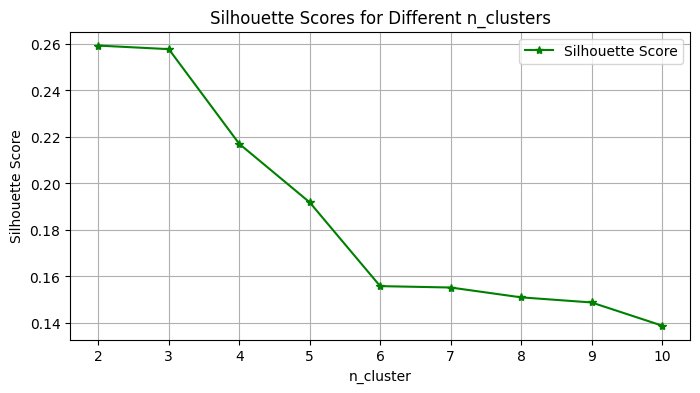

In [ ]:
#Create a silhoutte_score plot
plt.figure(figsize=(8, 4))

plt.plot(num_cluster[0:9], silhouettes_score[0:9], marker='*', color='green', label='Silhouette Score')

plt.title('Silhouette Scores for Different n_clusters')
plt.xlabel('n_cluster')
plt.ylabel('Silhouette Score')

plt.grid()
plt.legend()
plt.show()

- The highest silhouette_score is achieved when n_cluster = 2, and it gradually **decreases** when n_cluster **increases**.
- When n_clusters = 30, the silhouette_score is nearly the same as when n_clusters = 25.
- => When n_clusters is too large, the separation between clusters becomes poor, with no clear distinctions and resulting in less meaningful clustering.

##### b. Elbow plot

In [ ]:
custom_inertia = []
sklearn_inertia = []

#Experiment with many n_clusters and calculate WCSS
for i in range(1, 10):
    custom_KM1 = custom_KMeans(K = i, random_state=0)
    sklearn_KM2 = KMeans(n_clusters = i, random_state=0)

    custom_KM1.fit(X_std)
    sklearn_KM2.fit(X_std)

    custom_inertia.append(custom_KM1.inertia_)
    sklearn_inertia.append(sklearn_KM2.inertia_)

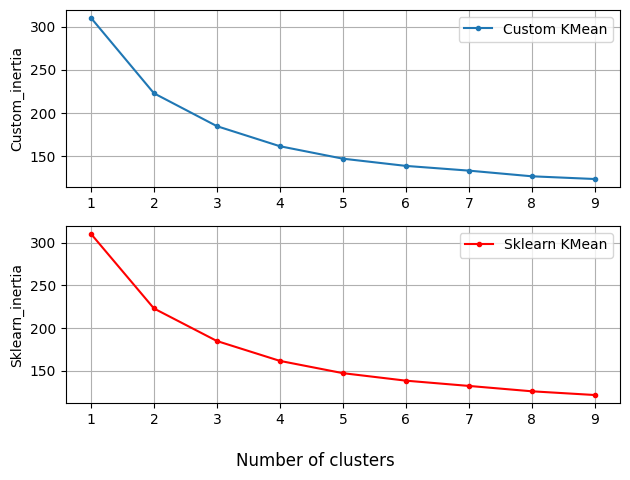

In [ ]:
#Elbow plot: custom_KMean & sklearn_KMean
fig, axes = plt.subplots(2, 1)

axes[0].plot(range(1,10), custom_inertia, marker = '.', label = 'Custom KMean')
axes[1].plot(range(1,10), sklearn_inertia, marker = '.', color = 'r', label = 'Sklearn KMean')

axes[0].set_ylabel('Custom_inertia')
axes[1].set_ylabel('Sklearn_inertia')

axes[0].legend()
axes[1].legend()

axes[0].grid()
axes[1].grid()

fig.supxlabel('Number of clusters')
plt.tight_layout()
plt.show()

- Elbow shape:
    - Both plots show a clear **elbow** shape, indicating a significant **drop** in inertia_ when n_clusters **increases**, followed by a leveling off.
    - This suggests that both algorithms are functioning well and are capable of identifying the optimal n_clusters.

- Inertia_ values:
    - The inertia_ values are the same => custom_KMeans algorithm is correct.

- Optimal n_clusters:
    - Both plots show an **elbow** from 2-4.
    - => I can choose n_clusters between 2 and 4.

#### 3.4 Compare the results of your K-means and the Sklearn K-means with the Private attribute in the dataset (ground truth).

In [ ]:
#I choose n_cluster = 2 because Private has 2 values
custom_KM = custom_KMeans(K=2, random_state=0)
custom_KM.fit(X_std)

sklearn_KM = KMeans(n_clusters=2, random_state=0)
sklearn_KM.fit(X_std)

KMeans(n_clusters=2, random_state=0)

To evaluate and measure the accuracy of the algorithms compared to the ground truth, I use the metrics:
- ARI (adjusted_rand_score)
- Accuracy_score
- Rand score

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score, accuracy_score

#ARI
ARI_cus = adjusted_rand_score(y, custom_KM.predict(X_std))
ARI_skl = adjusted_rand_score(y, sklearn_KM.predict(X_std))

#Accuracy
accuracy_cus = accuracy_score(y, custom_KM.predict(X_std))
accuracy_skl = accuracy_score(y, sklearn_KM.predict(X_std))

#rand_score
rand_cus = rand_score(y, custom_KM.predict(X_std))
rand_skl = rand_score(y, sklearn_KM.predict(X_std))

In [ ]:
#Create a DataFrame
custom_evl = [ARI_cus, accuracy_cus, rand_cus]
sklearn_evl = [ARI_skl, accuracy_skl, rand_skl]

evaluate = pd.DataFrame([custom_evl, sklearn_evl],
                        index=['Custom KMean', 'Sklearn KMean'],
                        columns=['ARI','Accurary','Rand Score']).T
evaluate

,Custom KMean,Sklearn KMean
ARI,-0.004145,-0.002391
Accurary,0.546976,0.548263
Rand Score,0.503775,0.504020


- **ARI**: -1 < ARI < 1. ARI is closed to 0 and negative, it indicates that the clustering results of both K-Means algorithms are poor compared to the **ground truth**.

- **Accuracy**: of both algorithms is below average when clustering based on the **Private** column. Sklearn KMean has slightly higher, but it's still hasn't reached a level that could be considered good.

- **Rand_score**: is also below average. This indicates that the results of both methods are not ideal and may need further improvement.

**In conclusion**
- Both of custom_KMeans and sklearn_KMeans models don't perform well when compared to the **ground truth** labels **'Private'**.
- The evaluation metrics (ARI, Accuracy, Rand_score) all indicate that the clustering of both models is almost random and does not correspond well with the actual labels.
- This may indicate that the KMeans model is not the best method for clustering this data.

# 4. Analysis and Interpretation

#### Visualize the clusters using appropriate plots (e.g., scatter plots) to gain insights into the data distribution and cluster separability.

In [ ]:
#Using PCA to reduce data dimensionality
from sklearn.decomposition import PCA

kmean_pca = PCA(n_components=3)
kmean_pca = kmean_pca.fit_transform(X_std)
kmean_pca

array([[-0.2569109 ,  0.10512418,  0.06175763],
       [-0.47404329, -0.39257929,  0.01523324],
       [-0.19896775, -0.22988333,  0.12349999],
       ...,
       [-0.13898181,  0.03939902,  0.12423344],
       [ 1.27973332, -0.07882734,  0.16824785],
       [-0.01153477,  0.01214635,  0.25008707]])

In [ ]:
#Sklearn_KMean using PCA data
sklearn_result = KMeans(n_clusters=2, random_state=42)
sklearn_result.fit(kmean_pca)

centers_skl = sklearn_result.cluster_centers_
centers_skl

array([[-0.26450525,  0.00610297,  0.00090063],
       [ 0.42516112, -0.00980981, -0.00144766]])

In [ ]:
#Custom_KMean using PCA data
custom_result = custom_KMeans(K=2, random_state=42)
custom_result.fit(kmean_pca)

centers_cus = custom_result.cluster_centers_
centers_cus

array([[ 0.42292115, -0.00627819, -0.00123186],
       [-0.26598814,  0.00394854,  0.00077476]])

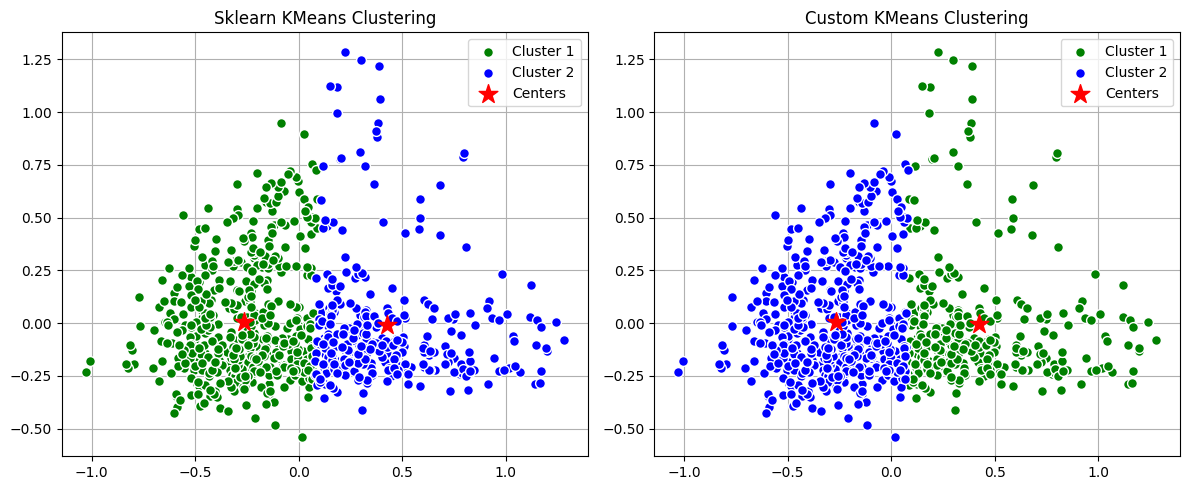

In [ ]:
#Scatter plot cluster
#Define a function to plot for clusters
def plot_clusters(X_pca, labels, centers, title, subplot):
    plt.subplot(subplot)
    #Draw the cluster
    plt.scatter(X_pca[labels == 0, 0], X_pca[labels == 0, 1], c='green', label='Cluster 1', s=50, edgecolor='w')
    plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1], c='blue', label='Cluster 2', s=50, edgecolor='w')

    #Draw the center points
    plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red', label='Centers')
    plt.gca().set_axisbelow(True)
    plt.grid(True)
    plt.legend()
    plt.title(title)

plt.figure(figsize=(12, 5))

#Draw cluster of sklearn_KMean and custom_KMean
plot_clusters(kmean_pca, sklearn_result.labels_, centers_skl, "Sklearn KMeans Clustering", 121)
plot_clusters(kmean_pca, custom_result.labels_, centers_cus, "Custom KMeans Clustering", 122)

plt.tight_layout()
plt.show()

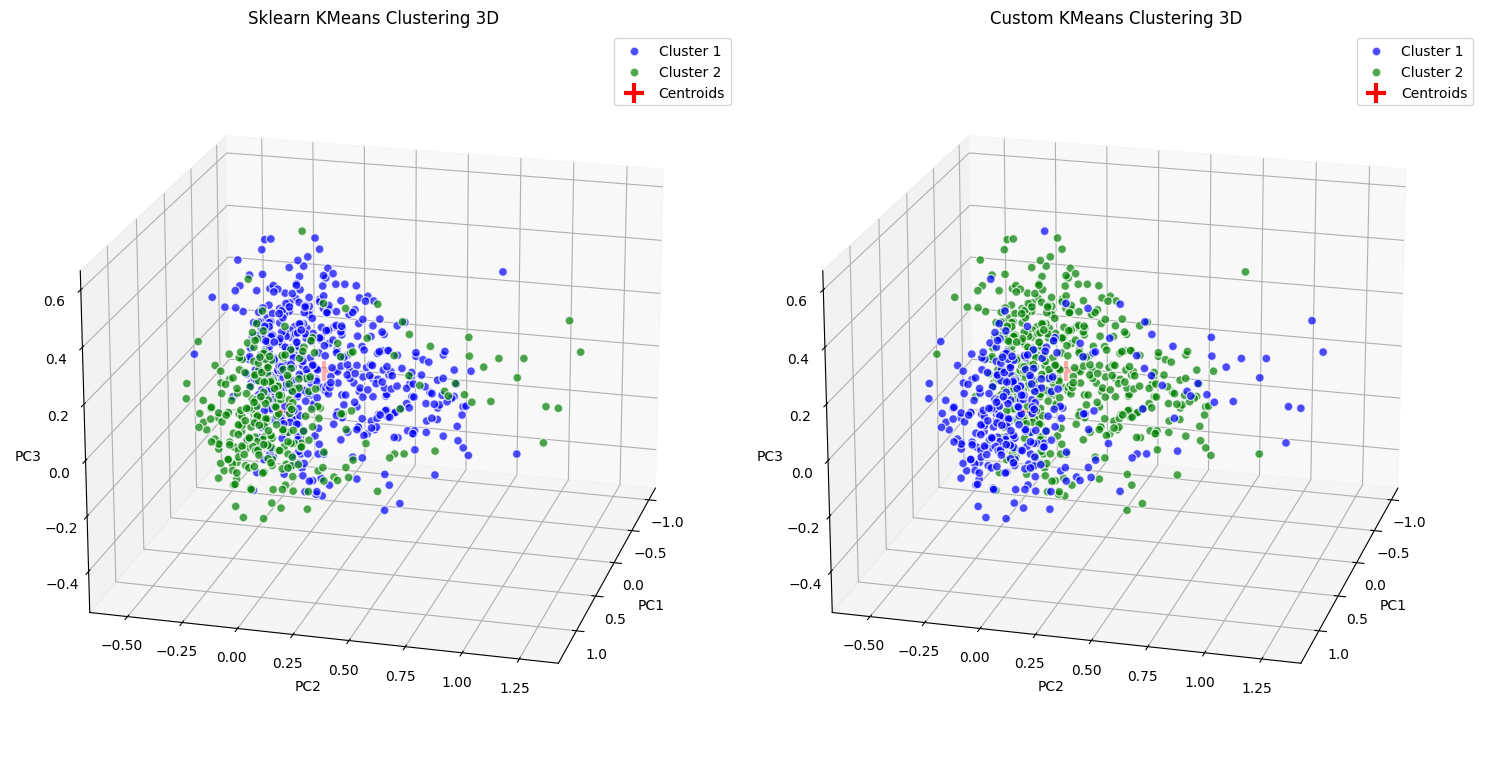

In [ ]:
#Scatter 3D-plot
#Define a function to plot 3D plots for clusters
def plot_3d_clusters(X_pca, labels, centers, title, subplot):
    ax = fig.add_subplot(subplot, projection='3d')
    colors = ['blue', 'green']

    #Plot the data points for each cluster
    for i, color in enumerate(colors):
        ix = np.where(labels == i)
        ax.scatter(X_pca[ix, 0], X_pca[ix, 1], X_pca[ix, 2],
                   c=color, label=f'Cluster {i+1}',
                   s=40, alpha=0.7, edgecolor='w')

    #Draw cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
               marker='+', s=200, linewidths=3, color='red', label='Centroids')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title)
    ax.view_init(elev=20, azim=15)
    ax.legend()


fig = plt.figure(figsize=(15, 8))

#Draw 3D cluster of sklearn_KMean and custom_KMean
plot_3d_clusters(kmean_pca, sklearn_result.labels_, centers_skl, "Sklearn KMeans Clustering 3D", 121)
plot_3d_clusters(kmean_pca, custom_result.labels_, centers_cus, "Custom KMeans Clustering 3D", 122)

plt.tight_layout()
plt.show()
